In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#for deep learning model
from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
df = pd.read_csv('cpih_copy.csv')
df.shape
df = df.reset_index(drop=True)
df.head()

,Title,CPIH ANNUAL RATE 00: ALL ITEMS 2015=100
0,1989-01-01,5.7
1,1989-02-01,5.8
2,1989-03-01,5.9
3,1989-04-01,5.6
4,1989-05-01,5.9


In [3]:
cpih = df.iloc[:,1:2]
train_set = cpih[:375].values
test_set = cpih[375:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (375, 1)
Test size: (31, 1)


In [4]:
#dates = pd.to_datetime(df['Title'])
#plt.plot_date(dates, cpih,fmt='-')

In [5]:
sc = MinMaxScaler()
train_set_scaled = sc.fit_transform(train_set)

In [6]:
x_train = []
y_train = []
for i in range(6,375):
    x_train.append(train_set_scaled[i-6:i,0])
    y_train.append(train_set_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(369, 6, 1)

In [7]:
reg = Sequential()
reg.add(LSTM(units = 50,return_sequences=True,input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50,return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50,return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=50))
reg.add(Dropout(0.2))
reg.add(Dense(units=1))
reg.compile(optimizer = 'adam',loss='mean_squared_error')
reg.fit(x_train,y_train, epochs=20, batch_size =1,verbose=2)

Epoch 1/20
369/369 - 8s - loss: 0.0181 - 8s/epoch - 23ms/step
Epoch 2/20
369/369 - 2s - loss: 0.0094 - 2s/epoch - 6ms/step
Epoch 3/20
369/369 - 2s - loss: 0.0081 - 2s/epoch - 6ms/step
Epoch 4/20
369/369 - 2s - loss: 0.0071 - 2s/epoch - 6ms/step
Epoch 5/20
369/369 - 2s - loss: 0.0078 - 2s/epoch - 6ms/step
Epoch 6/20
369/369 - 2s - loss: 0.0072 - 2s/epoch - 6ms/step
Epoch 7/20
369/369 - 2s - loss: 0.0057 - 2s/epoch - 6ms/step
Epoch 8/20
369/369 - 2s - loss: 0.0066 - 2s/epoch - 6ms/step
Epoch 9/20
369/369 - 2s - loss: 0.0060 - 2s/epoch - 6ms/step
Epoch 10/20
369/369 - 2s - loss: 0.0051 - 2s/epoch - 6ms/step
Epoch 11/20
369/369 - 2s - loss: 0.0093 - 2s/epoch - 6ms/step
Epoch 12/20
369/369 - 2s - loss: 0.0062 - 2s/epoch - 6ms/step
Epoch 13/20
369/369 - 2s - loss: 0.0053 - 2s/epoch - 6ms/step
Epoch 14/20
369/369 - 2s - loss: 0.0048 - 2s/epoch - 6ms/step
Epoch 15/20
369/369 - 2s - loss: 0.0054 - 2s/epoch - 6ms/step
Epoch 16/20
369/369 - 2s - loss: 0.0042 - 2s/epoch - 6ms/step
Epoch 17/20
369/

In [8]:
input = cpih[len(cpih)-len(test_set)-6:].values
input.shape
input = sc.transform(input)

In [9]:
x_test = []
for i in range(6,37):
    x_test.append(input[i-6:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(31, 6, 1)

1/1 [==============================] - 0s 31ms/step


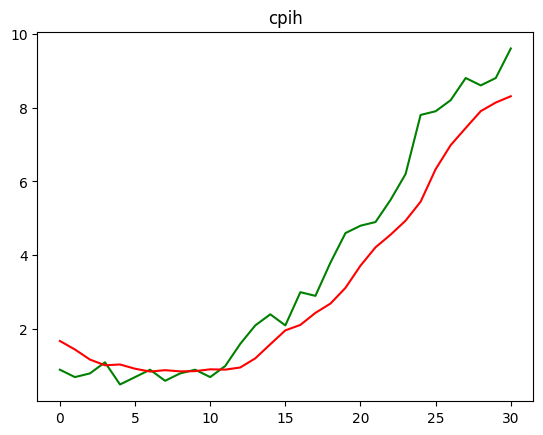

In [11]:
pred = reg.predict(x_test)
pred = sc.inverse_transform(pred)
plt.plot(test_set,color='green')
plt.plot(pred,color='red')
plt.title('cpih')
plt.show()